# K-means Clustering

L'algorithme $K$-means divise un ensemble de $N$ échantillons $X$ en $K$ clusters disjoints $C$, chacun étant décrit par la moyenne $\mu_j$ des échantillons dans le cluster. Les moyennes sont communément appelées les **« centroïdes des clusters »** ; notez qu'elles ne correspondent généralement pas à des points de $X$, bien qu'elles appartiennent au même espace. L'algorithme K-means vise à choisir des centroïdes qui minimisent l'inertie, ou la somme intra-cluster des carrés des distances :

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)$$

## Comment fonctionne l'algorithme

L'algorithme de clustering K-means utilise un raffinement itératif pour produire un résultat final. Les entrées de l'algorithme sont le nombre de clusters $K$ et l'ensemble de données. L'ensemble de données est une collection de caractéristiques pour chaque point. L'algorithme commence avec des estimations initiales des $K$ centroïdes, qui peuvent être générées aléatoirement ou sélectionnées aléatoirement dans l'ensemble de données. L'algorithme alterne ensuite entre deux étapes :

**Étape d'affectation des données** : Chaque centroïde définit un cluster. À cette étape, chaque point de données est assigné à son centroïde le plus proche, basé sur la distance euclidienne au carré. Plus formellement, si $c_i$ est la collection des centroïdes dans l'ensemble $C$, alors chaque point $x$ est assigné à un cluster basé sur :

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$

où dist( · ) est la distance euclidienne standard ($L_2$). Soit $S_i$ l'ensemble des points de données assignés à chaque $i$-ème centroïde.

**Étape de mise à jour des centroïdes** : À cette étape, les centroïdes sont recalculés en prenant la moyenne de tous les points assignés au cluster de ce centroïde.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i x_i}$$

L'algorithme alterne entre les étapes une et deux jusqu'à ce qu'un critère d'arrêt soit atteint (par exemple, aucun point de données ne change de cluster, la somme des distances est minimisée, ou un nombre maximal d'itérations est atteint).

**Convergence et initialisation aléatoire**

Cet algorithme est garanti de converger vers un résultat. Toutefois, le résultat peut être un optimum local (c'est-à-dire pas nécessairement le meilleur résultat possible). Ainsi, exécuter l'algorithme plusieurs fois avec des centroïdes de départ aléatoires peut donner un meilleur résultat.

<img src=https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif style="width: 500px;"/>


# **Part I**

**1. Importer les bibliothèques nécessaires:**
**numpy** avec l'alias np pour les opérations mathématiques.
**matplotlib.pyplot** avec l'alias plt pour la visualisation des données.
**pandas** avec l'alias pd pour la manipulation des données.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**2. Importer le jeu de données** 'Mall_Customers.csv' et extraire les colonnes 3 et 4 dans une variable `X` sous forme de tableau NumPy.

In [ ]:
data=pd.read_csv('/content/Mall_Customers (1).csv')

In [ ]:
X = data.iloc[:, [3, 4]].values

In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**3. Convertir le jeu de données en DataFrame** Pandas et afficher son contenu.

In [ ]:
df = pd.DataFrame(data)


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**4. Tracer un nuage de points** représentant l'âge (Age) en fonction du revenu annuel (Annual Income).

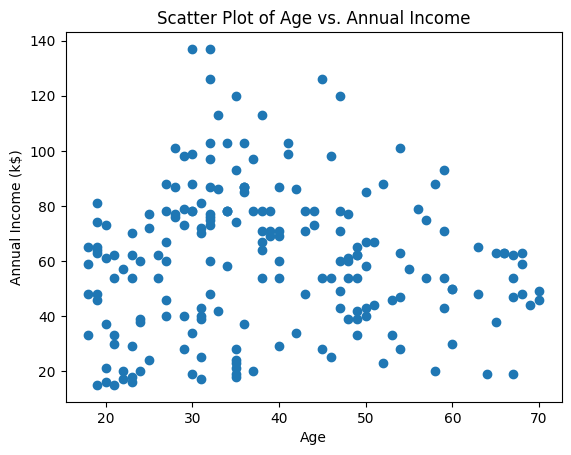

In [ ]:
age = df['Age']
annual_income = df['Annual Income (k$)']
plt.scatter(age, annual_income)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter Plot of Age vs. Annual Income')
plt.show()

5. Utiliser la méthode du coude (Elbow Method) pour déterminer le **nombre optimal de clusters**.

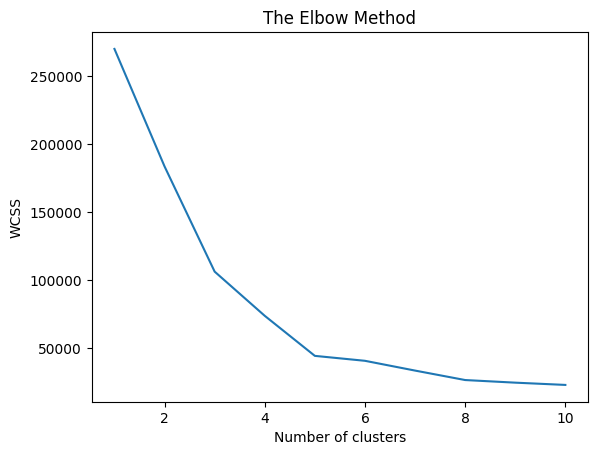

In [ ]:
from sklearn.cluster import KMeans



wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

6. Entraîner le modèle K-means sur les données avec k (nombre optimal) clusters et afficher les étiquettes prédites.

In [ ]:


optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X)


predicted_labels = kmeans.labels_


print(predicted_labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


7. Prédire à quel cluster appartient un point avec un revenu annuel de 40 et un âge de 67 ans.

In [ ]:



new_data_point = np.array([[40, 67]])


predicted_cluster = kmeans.predict(new_data_point)


print(predicted_cluster[0])

2


8. Visualiser les **clusters** formés ainsi que les **centroïdes** sur un graphique.

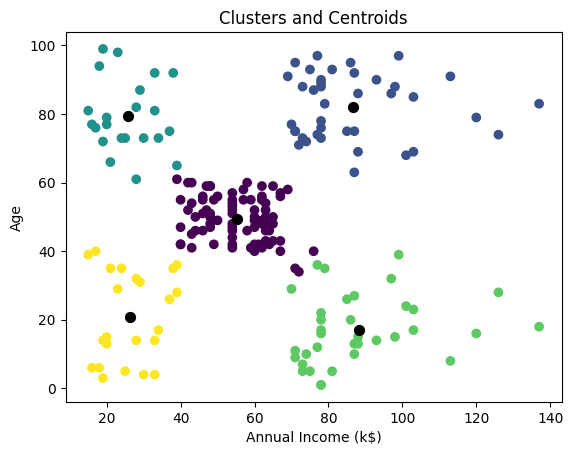

In [ ]:



plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='.', s=200, color='black')


plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.title('Clusters and Centroids')


plt.show()

# **Partie II**
## Les données (Data.CSV)

Pour ce projet, nous allons tenter d'utiliser le clustering KMeans pour regrouper les universités en deux groupes : privées et publiques. Nous utiliserons un DataFrame contenant 777 observations sur les 18 variables suivantes :

* **Private** : Un facteur avec les niveaux "No" et "Yes" indiquant si l'université est publique ou privée.
* **Apps** : Nombre de candidatures reçues.
* **Accept** : Nombre de candidatures acceptées.
* **Enroll** : Nombre de nouveaux étudiants inscrits.
* **Top10perc** : Pourcentage de nouveaux étudiants provenant des 10 % supérieurs de leur classe de lycée.
* **Top25perc** : Pourcentage de nouveaux étudiants provenant des 25 % supérieurs de leur classe de lycée.
* **F.Undergrad** : Nombre d'étudiants à temps plein.
* **P.Undergrad** : Nombre d'étudiants à temps partiel.
* **Outstate** : Frais de scolarité pour les étudiants hors de l'État.
* **Room.Board** : Coûts de logement et de repas.
* **Books** : Coûts estimés des livres.
* **Personal** : Dépenses personnelles estimées.
* **PhD** : Pourcentage de membres du corps professoral titulaires d'un doctorat.
* **Terminal** : Pourcentage de membres du corps professoral titulaires d'un diplôme terminal.
* **S.F.Ratio** : Ratio étudiants/professeurs.
* **perc.alumni** : Pourcentage d'anciens élèves qui font des dons.
* **Expend** : Dépenses d'enseignement par étudiant.
* **Grad.Rate** : Taux de diplomation.


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Lire le fichier 'College_Data.csv'** en utilisant la fonction 'read_csv' et définir la première colonne comme index.

In [ ]:
df1 = pd.read_csv('/content/data (1).csv', index_col=1)



2. Afficher le head() de la BD

In [ ]:
df1.head()

,private,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
apps,,,,,,,,,,,,,,,,,
1660,Yes,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2186,Yes,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
1428,Yes,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
417,Yes,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
193,Yes,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


2. Utiliser les méthodes 'info()' et 'describe()' pour explorer les caractéristiques des données.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 1660 to 2989
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   accept       777 non-null    int64  
 2   enroll       777 non-null    int64  
 3   top10perc    777 non-null    int64  
 4   top25perc    777 non-null    int64  
 5   f_undergrad  777 non-null    int64  
 6   p_undergrad  777 non-null    int64  
 7   outstate     777 non-null    int64  
 8   room_board   777 non-null    int64  
 9   books        777 non-null    int64  
 10  personal     777 non-null    int64  
 11  phd          777 non-null    int64  
 12  terminal     777 non-null    int64  
 13  s_f_ratio    777 non-null    float64
 14  perc_alumni  777 non-null    int64  
 15  expend       777 non-null    int64  
 16  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(15), object(1)
memory usage: 109.3+ KB


In [ ]:
df1.describe()

,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


3. Créer un nuage de points de 'grad_rate' par rapport à 'room_board', en **colorant** les points **selon la colonne 'private'** et en affichant la ligne de régression.

In [ ]:
df1.columns

Index(['private', 'accept', 'enroll', 'top10perc', 'top25perc', 'f_undergrad',
       'p_undergrad', 'outstate', 'room_board', 'books', 'personal', 'phd',
       'terminal', 's_f_ratio', 'perc_alumni', 'expend', 'grad_rate'],
      dtype='object')

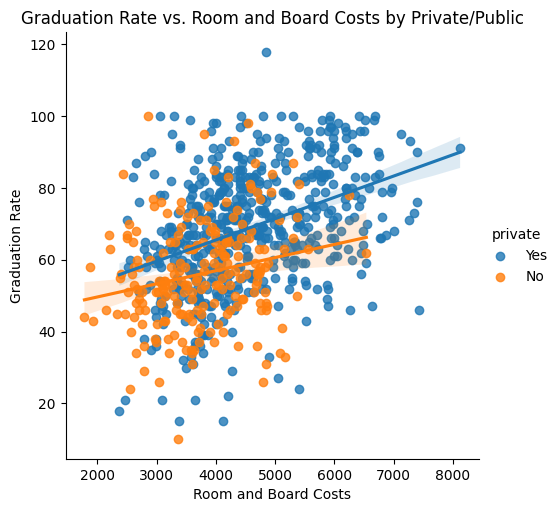

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame

# Create the scatter plot with regression line
sns.lmplot(x='room_board', y='grad_rate', data=df1, hue='private', fit_reg=True)

# Set plot labels and title
plt.xlabel('Room and Board Costs')
plt.ylabel('Graduation Rate')
plt.title('Graduation Rate vs. Room and Board Costs by Private/Public')

# Display the plot
plt.show()

4. Créer un nuage de points de 'f_undergrad' par rapport à 'outstate', en colorant les points selon la colonne 'private'.

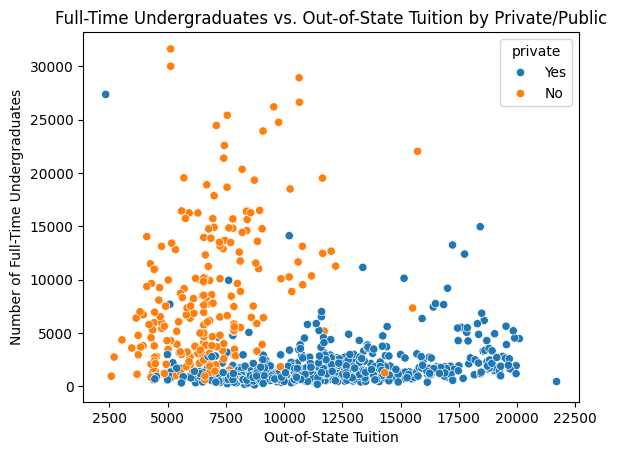

In [ ]:
sns.scatterplot(x='outstate', y='f_undergrad', data=df1, hue='private')

plt.xlabel('Out-of-State Tuition')
plt.ylabel('Number of Full-Time Undergraduates')
plt.title('Full-Time Undergraduates vs. Out-of-State Tuition by Private/Public')

plt.show()

**5. Créer un boxplot du ratio étudiant-professeur (`s_f_ratio`) en fonction du type d'université (`private`).**

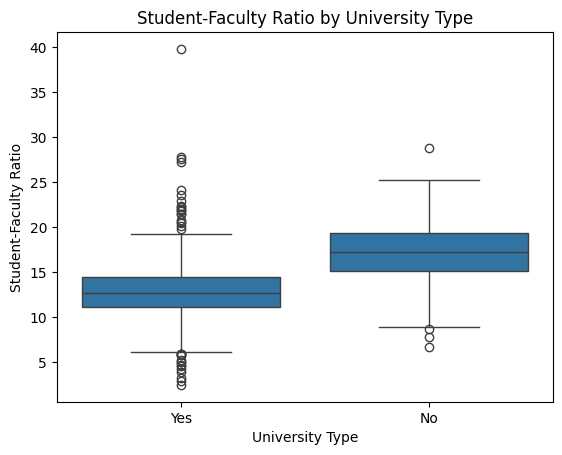

In [ ]:
sns.boxplot(x='private', y='s_f_ratio', data=df1)

# Set plot labels and title
plt.xlabel('University Type')
plt.ylabel('Student-Faculty Ratio')
plt.title('Student-Faculty Ratio by University Type')

# Display the plot
plt.show()

**6. Créer un boxplot du pourcentage d'anciens élèves qui font des dons (`perc_alumni`) en fonction du type d'université (`private`).**

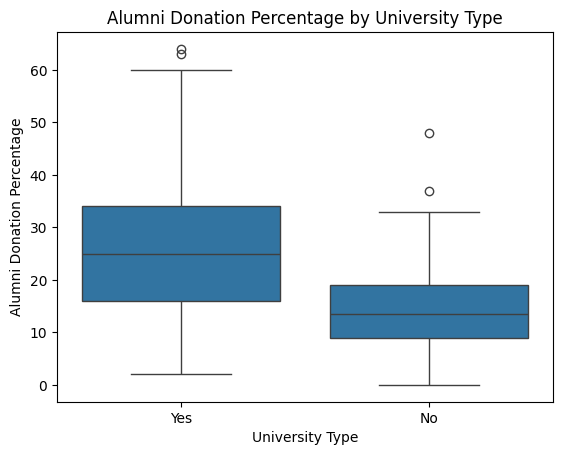

In [ ]:

sns.boxplot(x='private', y='perc_alumni', data=df1)

plt.xlabel('University Type')
plt.ylabel('Alumni Donation Percentage')
plt.title('Alumni Donation Percentage by University Type')

plt.show()

**7. Créer un histogramme empilé montrant les frais de scolarité hors État (`outstate`) en fonction du type d'université (`private`).**

Text(0.5, 1.0, 'Distribution of Out-of-State Tuition by University Type')

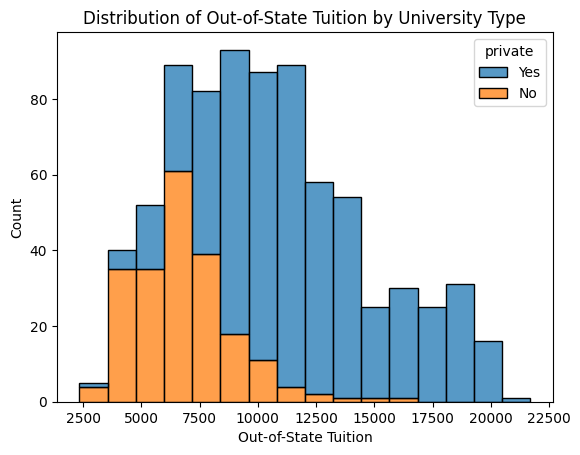

In [ ]:

#. Créer un histogramme empilé montrant les frais de scolarité hors État (outstate) en fonction du type d'université (private).

sns.histplot(data=df1, x='outstate', hue='private', multiple='stack')

plt.xlabel('Out-of-State Tuition')
plt.ylabel('Count')
plt.title('Distribution of Out-of-State Tuition by University Type')

**8. Quels sont les principaux écarts entre les frais de scolarité hors État (outstate) des universités privées et publiques ?**

In [ ]:
#Quels sont les principaux écarts entre les frais de scolarité hors État (outstate) des universités privées et publiques ?
df1.groupby('private')['outstate'].mean()

,outstate
private,
No,6813.410377
Yes,11801.693805


Réponse

**9. Créer un histogramme empilé similaire pour la colonne grad_rate en fonction du type d'université (private).**

Text(0.5, 1.0, 'Distribution of Graduation Rate by University Type')

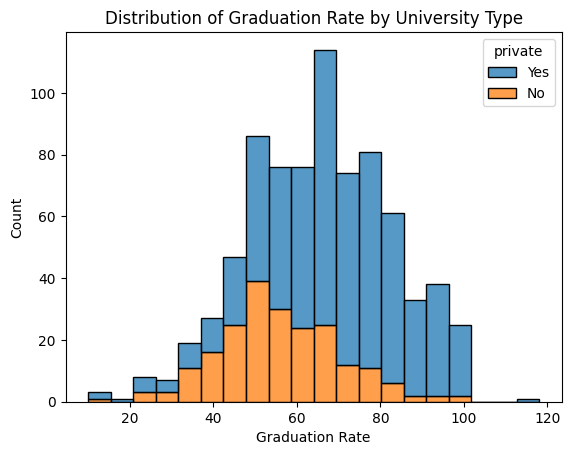

In [ ]:
# Créer un histogramme empilé similaire pour la colonne grad_rate en fonction du type d'université (private)
sns.histplot(data=df1, x='grad_rate', hue='private', multiple='stack')

plt.xlabel('Graduation Rate')
plt.ylabel('Count')
plt.title('Distribution of Graduation Rate by University Type')

**10. Quels types d'universités (privées ou publiques) ont tendance à avoir des taux de diplomation plus élevés ?**

In [ ]:
#Quels types d'universités (privées ou publiques) ont tendance à avoir des taux de diplomation plus élevés
df1.groupby('private')['grad_rate'].mean()

,grad_rate
private,
No,56.042453
Yes,68.998230


**Réponse**

**11. Identifier les universités ayant un taux de diplomation (`grad_rate`) supérieur à 100 %.**  

**Question de réflexion :**  
- Cette valeur est-elle logique ? Si non, que pourriez-vous faire pour corriger cette anomalie ?  

In [ ]:
#Identifier les universités ayant un taux de diplomation (grad_rate) supérieur à 100 %.

#Question de réflexion :

#Cette valeur est-elle logique ? Si non, que pourriez-vous faire pour corriger cette anomalie
df1[df1['grad_rate'] > 100]

,private,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
apps,,,,,,,,,,,,,,,,,
3847,Yes,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**Réponse**

**12. Remplacer toutes les valeurs de `grad_rate` supérieures à 100 par 100 à l'aide de la méthode `loc`.**   

In [ ]:
# Remplacer toutes les valeurs de grad_rate supérieures à 100 par 100 à l'aide de la méthode loc
df1.loc[df1['grad_rate'] > 100, 'grad_rate'] = 100

**13. Vérifiez si toutes les valeurs ont été correctement mises à jour.**

In [ ]:
#Vérifiez si toutes les valeurs ont été correctement mises à jour
df1[df1['grad_rate'] > 100]

,private,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
apps,,,,,,,,,,,,,,,,,


## Création du classifieur K_Means

**14. Importer KMeans à partir du package SciKit Learn.**

In [ ]:
#. Importer KMeans à partir du package SciKit Learn
from sklearn.cluster import KMeans

**15. Créer une instance d'un modèle K_Means avec k (nombre de classes) égale à 2.**

In [ ]:
# Créer une instance d'un modèle K_Means avec k (nombre de classes) égale à 2
kmeans = KMeans(n_clusters=2)

**16. LAncer l'apprentissage du modèle.**

In [ ]:
#LAncer l'apprentissage du modèle
kmeans.fit(df1.drop('private', axis=1))

KMeans(n_clusters=2)

**17. Afficher les centres des classes extraites.**

In [ ]:
# Afficher les centres des classes extraites
kmeans.cluster_centers_

array([[1.96774720e+03, 7.97990400e+02, 2.24768000e+01, 5.08752000e+01,
        3.91135200e+03, 9.98980800e+02, 8.94353440e+03, 4.10703520e+03,
        5.45542400e+02, 1.41723360e+03, 6.92096000e+01, 7.65184000e+01,
        1.49523200e+01, 1.99024000e+01, 7.87988160e+03, 6.20960000e+01],
       [2.22874342e+03, 7.05888158e+02, 4.84539474e+01, 7.60328947e+01,
        2.83048026e+03, 2.64500000e+02, 1.65966513e+04, 5.38750658e+03,
        5.65164474e+02, 1.02571053e+03, 8.68486842e+01, 9.27960526e+01,
        1.05427632e+01, 3.44276316e+01, 1.69804408e+04, 7.91907895e+01]])

**14. Afficher les statistiques descriptives des universités privées à l'aide de la méthode `describe()`.**

In [ ]:
#14. Afficher les statistiques descriptives des universités privées à l'aide de la méthode describe()
df1[df1['private'] == 'Yes'].describe()

,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,1305.702655,456.945133,29.330973,56.957522,1872.168142,433.966372,11801.693805,4586.143363,547.506195,1214.440708,71.093805,78.534513,12.945487,25.890265,10486.353982,68.966372
std,1369.549478,457.529136,17.851391,19.588360,2110.661773,722.370487,3707.470822,1089.697557,174.932303,632.879647,17.350886,15.450251,3.518573,12.400755,5682.576587,16.673032
min,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,2370.000000,250.000000,250.000000,8.000000,24.000000,2.500000,2.000000,3186.000000,15.000000
25%,501.000000,206.000000,17.000000,42.000000,840.000000,63.000000,9100.000000,3736.000000,450.000000,800.000000,60.000000,68.000000,11.100000,16.000000,7477.000000,58.000000
50%,859.000000,328.000000,25.000000,55.000000,1274.000000,207.000000,11200.000000,4400.000000,500.000000,1100.000000,73.000000,81.000000,12.700000,25.000000,8954.000000,69.000000
75%,1580.000000,520.000000,36.000000,70.000000,2018.000000,541.000000,13970.000000,5400.000000,600.000000,1500.000000,85.000000,92.000000,14.500000,34.000000,11625.000000,81.000000
max,13007.000000,4615.000000,96.000000,100.000000,27378.000000,10221.000000,21700.000000,8124.000000,2340.000000,6800.000000,100.000000,100.000000,39.800000,64.000000,56233.000000,100.000000


**15. Afficher les statistiques descriptives des universités publiques à l'aide de la méthode `describe()`.**

In [ ]:
#15. Afficher les statistiques descriptives des universités publiques à l'aide de la méthode describe()
df1[df1['private'] == 'No'].describe()

,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,3919.287736,1640.872642,22.834906,52.702830,8571.004717,1978.188679,6813.410377,3748.240566,554.377358,1676.981132,76.834906,82.816038,17.139151,14.358491,7458.316038,56.042453
std,3477.266276,1261.592009,16.180443,20.091058,6467.696087,2321.034696,2145.248389,858.139928,135.729935,677.515680,12.317525,12.069669,3.418049,7.518935,2695.541611,14.583412
min,233.000000,153.000000,1.000000,12.000000,633.000000,9.000000,2580.000000,1780.000000,96.000000,400.000000,33.000000,33.000000,6.700000,0.000000,3605.000000,10.000000
25%,1563.250000,701.750000,12.000000,37.000000,3601.000000,600.000000,5366.000000,3121.500000,500.000000,1200.000000,71.000000,76.000000,15.100000,9.000000,5715.000000,46.000000
50%,2929.500000,1337.500000,19.000000,51.000000,6785.500000,1375.000000,6609.000000,3708.000000,550.000000,1649.000000,78.500000,86.000000,17.250000,13.500000,6716.500000,55.000000
75%,5264.000000,2243.750000,27.500000,65.000000,12507.000000,2495.250000,7844.000000,4362.000000,612.000000,2051.250000,86.000000,92.000000,19.325000,19.000000,8570.250000,65.000000
max,26330.000000,6392.000000,95.000000,100.000000,31643.000000,21836.000000,15732.000000,6540.000000,1125.000000,4288.000000,103.000000,100.000000,28.800000,48.000000,16527.000000,100.000000


**16. Créer un DataFrame contenant les centres des clusters, en utilisant les noms des colonnes du DataFrame original, et déterminer si les étiquettes (0 ou 1) correspondent clairement aux universités privées ou publiques.**

In [ ]:
#16. Créer un DataFrame contenant les centres des clusters, en utilisant les noms des colonnes du DataFrame original, et déterminer si les étiquettes (0 ou 1) correspondent clairement aux universités privées ou publiques
df2 = pd.DataFrame(df1.describe())
feat=list(df2.columns)
dff=pd.DataFrame(kmeans.cluster_centers_,columns=feat)
dff

,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,1967.747200,797.990400,22.476800,50.875200,3911.352000,998.9808,8943.534400,4107.035200,545.542400,1417.233600,69.209600,76.518400,14.952320,19.902400,7879.881600,62.096000
1,2228.743421,705.888158,48.453947,76.032895,2830.480263,264.5000,16596.651316,5387.506579,565.164474,1025.710526,86.848684,92.796053,10.542763,34.427632,16980.440789,79.190789


**17. Afficher les étiquettes des clusters générées par le modèle K-Means à l'aide de l'attribut `labels_`.**

In [ ]:
#Afficher les étiquettes des clusters générées par le modèle K-Means à l'aide de l'attribut labels_

kmeans.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

**18. Créer une nouvelle colonne appelée `Cluster` dans le DataFrame, où 1 représente une université privée et 0 une université publique, à l'aide d'une fonction de conversion.**  

In [ ]:
# Créer une nouvelle colonne appelée Cluster dans le DataFrame, où 1 représente une université privée et 0 une université publique, à l'aide d'une fonction de conversion.
df1['Cluster'] = kmeans.labels_
df1['Cluster'] = df1['Cluster'].map({1: 'Private', 0: 'Public'})

In [ ]:
df1.head()

,private,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,Cluster
apps,,,,,,,,,,,,,,,,,,
1660,Yes,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,Public
2186,Yes,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,Public
1428,Yes,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,Public
417,Yes,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Private
193,Yes,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,Public


**19. Créer une matrice de confusion et un rapport de classification pour évaluer la performance du clustering K-Means en comparant les étiquettes générées aux vraies étiquettes.**  

In [ ]:
# Créer une matrice de confusion et un rapport de classification pour évaluer la performance du clustering K-Means en comparant les étiquettes générées aux vraies étiquettes
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df1['private'], df1['Cluster']))
print(classification_report(df1['private'], df1['Cluster']))

[[  0   3 209   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0 149 416   0]]
              precision    recall  f1-score   support

          No       0.00      0.00      0.00     212.0
     Private       0.00      0.00      0.00       0.0
      Public       0.00      0.00      0.00       0.0
         Yes       0.00      0.00      0.00     565.0

    accuracy                           0.00     777.0
   macro avg       0.00      0.00      0.00     777.0
weighted avg       0.00      0.00      0.00     777.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

## Performances de clustering (par exemple, distance entre les centroïdes)

**20. Créer deux DataFrames distincts contenant uniquement les données des universités privées (`private == 'Yes'`) et publiques (`private == 'No'`).**

In [ ]:
#Créer deux DataFrames distincts contenant uniquement les données des universités privées (private == 'Yes') et publiques (private == 'No')
df_private = df1[df1['private'] == 'Yes']
df_public = df1[df1['private'] == 'No']

**21. Ajuster les paramètres de `KMeans` tels que `max_iter` et `n_init`, puis calculer les distances entre les centroïdes des clusters et comparer les moyennes des universités privées et publiques.**

In [ ]:
# Ajuster les paramètres de KMeans tels que max_iter et n_init, puis calculer les distances entre les centroïdes des clusters et comparer les moyennes des universités privées et publiques
kmeans = KMeans(n_clusters=2, max_iter=300, n_init=10)
kmeans.fit(df1.drop('private', axis=1))

ValueError: could not convert string to float: 'Public'